In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.colors as clt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

In [40]:
income_data = pd.read_csv("historical_income.csv")
income = pd.DataFrame(income_data)
income.head()
income["Per Capita Adjusted for 2017 USD"] = income["Per Capita Adjusted for 2017 USD"].str.replace(",", "")


income["Per Capital Adjusted for 2017 USD"] = pd.to_numeric(income["Per Capita Adjusted for 2017 USD"])
income.style.format({
    "Per Capital Adjusted for 2017 USD": "${:.2}".format})
income1 = income[:19]



In [52]:
labor_data = pd.read_csv("labor_stats.csv")
labor_data["Annual"] = labor_data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].mean(axis=1)
labor2 = labor_data.drop(labor_data.index[:19])
Mar = labor_data["Mar"]
Jun = labor_data["Jun"]
Sep = labor_data["Sep"]
Dec = labor_data["Dec"]
Avg = labor_data["Annual"]
Mar1 = Mar[19:]
Jun1 = Jun[19:]
Sep1 = Sep[19:]
Dec1 = Dec[19:]

labor2
unemp = list(zip(Mar1, Jun1, Sep1, Dec1))
unemp1 = pd.Series(unemp).values
unemp2 = np.concatenate(unemp1)
labor2

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
19,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0,4.216667
20,2000,4.0,4.1,4.0,3.8,4.0,4.0,4.0,4.1,3.9,3.9,3.9,3.9,3.966667
21,2001,4.2,4.2,4.3,4.4,4.3,4.5,4.6,4.9,5.0,5.3,5.5,5.7,4.741667
22,2002,5.7,5.7,5.7,5.9,5.8,5.8,5.8,5.7,5.7,5.7,5.9,6.0,5.783333
23,2003,5.8,5.9,5.9,6.0,6.1,6.3,6.2,6.1,6.1,6.0,5.8,5.7,5.991667
24,2004,5.7,5.6,5.8,5.6,5.6,5.6,5.5,5.4,5.4,5.5,5.4,5.4,5.541667
25,2005,5.3,5.4,5.2,5.2,5.1,5.0,5.0,4.9,5.0,5.0,5.0,4.9,5.083333
26,2006,4.7,4.8,4.7,4.7,4.6,4.6,4.7,4.7,4.5,4.4,4.5,4.4,4.608333
27,2007,4.6,4.5,4.4,4.5,4.4,4.6,4.7,4.6,4.7,4.7,4.7,5.0,4.616667
28,2008,5.0,4.9,5.1,5.0,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3,5.800000


In [42]:
education_data = pd.read_csv("education_vs_income.csv", skiprows = 4)
education_data.rename(columns = {
    "Unnamed: 3": "Median Income in 2017 USD",
    "Unnamed: 5": "Mean Income in 2017 USD"}, inplace=True)

education_data["Educational Attainment"] = ""
education_data.iloc[1:32, education_data.columns.get_loc("Educational Attainment")] = "Total"
education_data.iloc[32:60, education_data.columns.get_loc("Educational Attainment")] = "9th Grade"
education_data.iloc[63:91, education_data.columns.get_loc("Educational Attainment")] = "High School No Diploma"
education_data.iloc[94:122, education_data.columns.get_loc("Educational Attainment")] = "GED or HS Diploma"
education_data.iloc[125:153, education_data.columns.get_loc("Educational Attainment")] = "Some College"
education_data.iloc[156:184, education_data.columns.get_loc("Educational Attainment")] = "Associate Degree"
education_data.iloc[187:215, education_data.columns.get_loc("Educational Attainment")] = "Bachelor's Degree or More"
education_data.iloc[218:246, education_data.columns.get_loc("Educational Attainment")] = "Bachelor's Degree"
education_data.iloc[249:277, education_data.columns.get_loc("Educational Attainment")] = "Master's Degree"
education_data.iloc[280:308, education_data.columns.get_loc("Educational Attainment")] = "Professional Degree"
education_data.iloc[311:339, education_data.columns.get_loc("Educational Attainment")] = "Doctorate Degree"

edu_data = education_data.dropna(axis=0, how="any")
edu_csv = open("Education_Data_Cleaned.csv", "w")
csv.writer(edu_csv)
edu_data.to_csv("Education_Data_Cleaned.csv")
edu_data.keys()
edu_data.head()

,Educational attainment and income year,Number (thousand),Median income,Median Income in 2017 USD,Mean income,Mean Income in 2017 USD,Educational Attainment
1,2017,"121,375","62,625","62,625","87,734","87,734",Total
2,2016,"119,985","60,523","61,825","84,538","86,356",Total
3,2015,"119,457","58,044","60,057","80,837","83,640",Total
4,2014,"118,217","55,283","57,299","77,297","80,115",Total
5,2013 (39),"117,279","55,407","58,400","76,898","81,052",Total


In [43]:
mort_csv = open("tieredaffordability_mortgage.csv")
mort_df = (pd.read_csv(mort_csv))

mort_df1 = mort_df.drop(mort_df.index[3:])
mort_df1
#mort_df1 = mort_df1.T
#mort_df1.drop(mort_df1.index[:3])
#mort_df1
#mort_csv = open("Mort_Data_Cleaned.csv", "w")
#csv.writer(mort_csv)
#mort_df1.to_csv("Mort_Data_Cleaned.csv")
#mort_df1.head()


,RegionID,RegionName,PopRank,tier,1999-06-30,1999-09-30,1999-12-31,2000-03-31,2000-06-30,2000-09-30,...,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30
0,102001,United States,0,Bottom Tier,0.303985,0.316021,0.323100,0.337265,0.341345,0.331888,...,0.198006,0.205808,0.205446,0.210353,0.206243,0.207603,0.209890,0.235805,0.241146,0.238614
1,102001,United States,0,Middle Tier,0.185879,0.193666,0.200559,0.210686,0.213967,0.207215,...,0.140809,0.145112,0.144375,0.146110,0.142303,0.141536,0.141410,0.156327,0.157769,0.153850
2,102001,United States,0,Upper Tier,0.152307,0.158555,0.162713,0.170843,0.173628,0.168954,...,0.112647,0.116110,0.116479,0.119109,0.116787,0.116844,0.117129,0.130298,0.132079,0.129346


In [44]:
mort_csv = open("mort_data_cleaned1.csv")
mort_df2 = (pd.read_csv(mort_csv))
mort_df2["Unemployment"] = [4.2, 4.3, 4.2, 4. , 4. , 4. , 3.9, 3.9, 4.3, 4.5, 5. , 5.7, 5.7,
       5.8, 5.7, 6. , 5.9, 6.3, 6.1, 5.7, 5.8, 5.6, 5.4, 5.4, 5.2, 5. ,
       5. , 4.9, 4.7, 4.6, 4.5, 4.4, 4.4, 4.6, 4.7, 5. , 5.1, 5.6, 6.1,
       7.3, 8.7, 9.5, 9.8, 9.9, 9.9, 9.4, 9.5, 9.3, 9. , 9.1, 9. , 8.5,
       8.2, 8.2, 7.8, 7.9, 7.5, 7.5, 7.2, 6.7, 6.7, 6.1, 5.9, 5.6, 5.4,
       5.3, 5. , 5. , 5. , 4.9, 5. , 4.7, 4.4, 4.3, 4.2, 4.1, 4. , 4. ,
       3.7]
mort_df3 = mort_df2.drop(mort_df2.index[-6:])
#mort_df4 = mort_df3[mort_df3.tier != '6/']
#mort_df3[mort_df3.tier != '3/']

mort_df4 = mort_df3[::4]

mort_df4[["Upper Tier", "Middle Tier", "Bottom Tier", "Unemployment"]] = mort_df4[["Upper Tier", "Middle Tier", "Bottom Tier", "Unemployment"]].apply(pd.to_numeric)

mort_df4["Unemployment"] = mort_df4["Unemployment"].div(100)
mort_df4.style.format({
    "Unemployment": "{:.2%}".format,
    "Upper Tier": "{:.2%}".format,
    "Middle Tier": "{:.2%}".format,
    "Bottom Tier": "{:.2%}".format})
mort_df4["tier"] = pd.to_datetime(mort_df4["tier"])
mort_df4.dtypes

tier            datetime64[ns]
Bottom Tier            float64
Middle Tier            float64
Upper Tier             float64
Unemployment           float64
dtype: object

In [45]:
a = "#000080"
b = "#00BFFF"
c = "#32cd32"
d = "#FF4500"
clt.to_hex(a)
clt.to_hex(b)
clt.to_hex(c)
clt.to_hex(d)

'#ff4500'

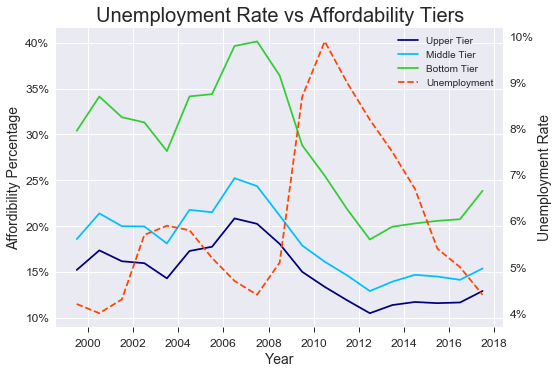

In [46]:
rate = mort_df4["Unemployment"]
date = mort_df4["tier"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, mort_df4["Upper Tier"], color=a)
ax1.plot(date, mort_df4["Middle Tier"], color=b)
ax1.plot(date, mort_df4["Bottom Tier"], color=c)
ax2.plot(date, mort_df4["Unemployment"], color=d, linestyle="--")
plt.title("Unemployment Rate vs Affordability Tiers",fontdict = {'fontsize' : 20})
ax1.set_xlabel("Year",fontdict = {'fontsize' : 14})
ax1.set_ylabel("Affordibility Percentage",fontdict = {'fontsize' : 14})
ax2.set_ylabel("Unemployment Rate",fontdict = {'fontsize' : 14})
ax1.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
ax2.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

ax1.tick_params(direction='out', length=5, axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)

plt.grid()
handles, labels = ax1.get_legend_handles_labels()
handles1, labels1 = ax2.get_legend_handles_labels()
plt.legend(handles + handles1, labels + labels1, loc="upper right")


plt.style.use("seaborn")
plt.savefig("Affordability_And_Unemployment.png")
plt.show()

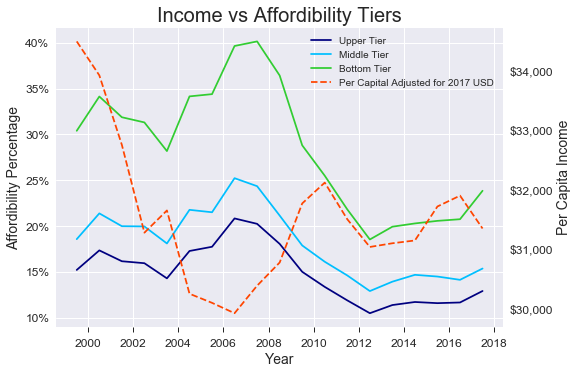

In [47]:
per_capita = income1["Per Capital Adjusted for 2017 USD"]
date = mort_df4["tier"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, mort_df4["Upper Tier"], color=a)
ax1.plot(date, mort_df4["Middle Tier"], color=b)
ax1.plot(date, mort_df4["Bottom Tier"], color=c)
ax2.plot(date, per_capita, color=d, linestyle="--")
plt.title("Income vs Affordibility Tiers",fontdict = {'fontsize' : 20})
plt.xlabel("Unemployment Rate")

ax1.set_xlabel("Year",fontdict = {'fontsize' : 14})
ax1.set_ylabel("Affordibility Percentage",fontdict = {'fontsize' : 14})
ax2.set_ylabel("Per Capita Income",fontdict = {'fontsize' : 14})

ax1.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format)) 
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax1.tick_params(direction='out', length=5, axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)

plt.grid()
handles, labels = ax1.get_legend_handles_labels()
handles1, labels1 = ax2.get_legend_handles_labels()
legend = plt.legend(handles + handles1, labels + labels1, loc="upper right")

plt.style.use("seaborn")
plt.savefig("Affordability_And_Income.png")
plt.show()

In [48]:
mort_df5 = mort_df1[["2016-03-31", "2016-06-30", "2016-09-30", "2016-12-31"]]
mort_df5 = mort_df5.T
mort_df5.columns = ["Upper", "Middle", "Bottom"]
mean1 = mort_df5["Upper"].mean()
mean2 = mort_df5["Middle"].mean()
mean3 = mort_df5["Bottom"].mean()

In [49]:
total = edu_data.iloc[[29, 57, 85, 113, 141, 169, 197, 225, 253, 281]]

total["Median Income in 2017 USD"] = total["Median Income in 2017 USD"].astype(str).str.replace("\n", "")
med_income = total["Median Income in 2017 USD"]
repr(med_income)
tier = []
perc = []
total["Median Income in 2017 USD"] = total["Median Income in 2017 USD"].astype(str).str.replace(",", "")

total["Median Income in 2017 USD"] = total["Median Income in 2017 USD"].apply(pd.to_numeric)
med_income = total["Median Income in 2017 USD"]

for x in med_income: 
    if x < 39999:
        tier.append("Bottom")
        perc.append(mean1)
    if x <= 118000 and x >= 40000:
        tier.append("Middle")
        perc.append(mean2)
    if x > 118000:
        tier.append("Upper")
        perc.append(mean3)
total["Tier"] = tier
total["Mort Perc"] = perc

#total.style.format({
    #"Median Income in 2017 USD": "{$}".format})

total

,Educational attainment and income year,Number (thousand),Median income,Median Income in 2017 USD,Mean income,Mean Income in 2017 USD,Educational Attainment,Tier,Mort Perc
33,2016,"4,224","26,979",27559,"40,828","41,706",9th Grade,Bottom,0.214885
64,2016,"7,436","28,372",28982,"40,195","41,059",High School No Diploma,Bottom,0.214885
95,2016,"32,451","43,331",44263,"58,564","59,823",GED or HS Diploma,Middle,0.145394
126,2016,"21,022","54,163",55328,"71,065","72,593",Some College,Middle,0.145394
157,2016,"12,658","62,809",64160,"79,308","81,014",Associate Degree,Middle,0.145394
188,2016,"42,194","97,072",99160,"124,987","127,675",Bachelor's Degree or More,Middle,0.145394
219,2016,"25,657","90,268",92209,"113,019","115,450",Bachelor's Degree,Middle,0.145394
250,2016,"12,279","102,445",104648,"131,304","134,128",Master's Degree,Middle,0.145394
281,2016,"1,781","136,015",138940,"184,698","188,670",Professional Degree,Upper,0.120264
312,2016,"2,477","130,136",132935,"174,717","178,474",Doctorate Degree,Upper,0.120264


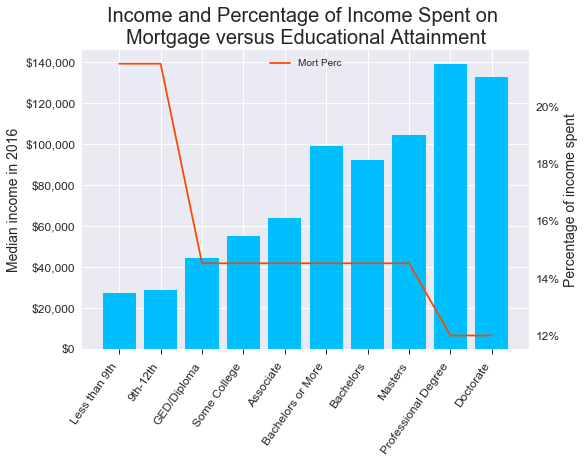

In [50]:
x_axis = np.arange(len(total["Median Income in 2017 USD"])) 
data = total["Median Income in 2017 USD"]
labels = ["Less than 9th", "9th-12th", "GED/Diploma", "Some College", "Associate", "Bachelors or More", "Bachelors", "Masters", "Professional Degree", "Doctorate"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(x_axis, data, color=b, align='center')
ax2.plot(x_axis, total["Mort Perc"], color=d)

ax1.set_xticks(x_axis)
ax1.set_xticklabels(labels, rotation=55, ha="right")
ax1.set_ylabel("Median income in 2016",fontdict = {'fontsize' : 14})
ax2.set_ylabel("Percentage of income spent", fontdict = {'fontsize' : 14})
ax1.yaxis.set_major_formatter(FuncFormatter("${:,.0f}".format))
ax2.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format)) 
#ax1.tick_params(,  grid_alpha=0.5)
ax1.tick_params(direction='out', length=5, axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
plt.grid()
plt.title("Income and Percentage of Income Spent on \nMortgage versus Educational Attainment", fontdict = {'fontsize' : 20})
handles, labels = ax1.get_legend_handles_labels()
handles1, labels1 = ax2.get_legend_handles_labels()
plt.legend(handles + handles1, labels + labels1, loc="upper center")


plt.style.use("seaborn")
plt.savefig("Affordability_And_Education.png")
plt.show()

In [108]:
data_metro = pd.read_csv("project/RDC_MarketHotness_Monthly_Metro.csv")
data_metro
data_metro.head(10)
data_metro.count()
data_metro.dtypes
# Remove n/a
data_clean = data_metro.dropna(how='any')
data_clean.count()
data_clean.dtypes
# Rename columns
data_rename = data_clean.rename(index=str, 
                                columns={"Hotness Rank ": "hrank", 
                                         "Hotness Score": "hscore",
                                         "Median Listing Price": "MedListPrice"}
                               )
# data_rename.columns
# data_rename.head()
data_sort = data_rename.sort_values(by=['hrank'])
data_sort1 = data_sort.rename(columns={"CBSATitle":"City"})
data_sort1['City'] = data_sort1['City'].str[:-4]

data_sort1

,Month,CBSACode,City,Nielsen HH Rank,hrank,Hotness Rank M/M,Hotness Rank Y/Y,hscore,Supply Score,Demand Score,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
220,201812,17020,Chico,196,1.0,15.0,28.0,100.000000,100.000000,100.000000,...,-0.4559,-43.0,0.1939,0.7640,2.5738,330000.0,0.0909,0.1466,1.1419,0
285,201812,33260,Midland,260,2.0,-1.0,18.0,98.494983,97.658863,99.331104,...,-0.2000,-28.0,0.0480,0.2241,2.3279,350790.0,-0.0214,0.1288,1.2138,0
280,201812,36220,Odessa,292,3.0,1.0,41.0,94.816054,95.317726,94.314381,...,-0.1791,-25.0,0.0505,0.4444,1.7049,270000.0,0.0133,0.3171,0.9343,0
95,201812,18140,Columbus,31,4.0,-1.0,5.0,94.481605,91.638796,97.324415,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0
252,201812,23060,Fort Wayne,119,5.0,-3.0,7.0,94.314381,88.963211,99.665552,...,0.0000,-19.0,0.0068,0.3704,2.4262,179900.0,0.0000,0.1105,0.6225,0
117,201812,41860,San Francisco-Oakland-Hayward,11,6.0,2.0,-4.0,94.147157,99.331104,88.963211,...,0.1333,-29.0,0.1034,-0.2381,1.5738,855000.0,-0.0431,-0.0372,2.9585,0
242,201812,40900,Sacramento--Roseville--Arden-Arcade,29,7.0,0.0,0.0,93.478261,91.638796,95.317726,...,0.0172,-21.0,0.0863,0.0094,1.7541,449000.0,0.0090,0.0228,1.5536,0
78,201812,17820,Colorado Springs,77,8.0,-2.0,-4.0,93.311037,91.638796,94.983278,...,0.0727,-21.0,0.0291,-0.1017,1.7377,369900.0,0.0079,-0.0263,1.2799,0
131,201812,14460,"Boston-Cambridge-Newton, M",10,9.0,-4.0,7.0,90.635452,82.608696,98.662207,...,0.0156,-15.0,0.0268,0.2523,2.1967,499900.0,-0.0014,0.0204,1.7298,0
54,201812,44700,Stockton-Lodi,95,10.0,8.0,-5.0,89.632107,96.655518,82.608696,...,0.1250,-26.0,0.0581,-0.0808,1.4918,399000.0,0.0067,0.0364,1.3806,0


In [121]:
edu_city = pd.read_csv("Education_City.csv", encoding = "ISO-8859-1")

edu_city.drop(["GEO.id", "GEO.id2", "GEO.display-label", "GCT_STUB.target-geo-id","GCT_STUB.target-geo-id2", "GCT_STUB.display-label", "HC02"], axis=1, inplace=True)

edu_city1 = edu_city.rename(columns={"GCT_STUB.display-label.1":"City", "HC01":"HS Completion Rate"})
edu_city2 = edu_city1.drop(edu_city1.index[:2])
merged = data_sort1.merge(edu_city1, on="City", how="inner")
edu1 = pd.Series([edu_city2["City"]])
edu_city2
edu1


0    2                                  Alabama
3  ...
dtype: object